## Welcome!

### Some Jupyter Notebook hacks
* To run a cell, hit `Ctrl + Shift + Enter`
* To run the whole sheet, hit `Ctrl + F9`
* To run the cells above, hit `Ctrl + F8`
* To run the cells below, hit `Ctrl + F10`


# Install and import `pygismo` and other packages

We import `pygismo`

In [2]:
import pygismo as gs

We also import `numpy` and `matplotlib`

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Constructing a 1D basis

Similar to the `1D_basis_example.ipynb`, we construct a B-spline basis with knot vector Ξ = { 0, 0, 0, 0.25, 0.50, 0.75, 1, 1, 1 }.

In [4]:
kv = gs.nurbs.gsKnotVector(np.array([0,0,0,0.50,1,1,1]),2)
basis = gs.nurbs.gsBSplineBasis(kv)

print('The knots of the basis are:\n',basis.knots(0).get())
print('The size of the basis is: ',basis.size())

The knots of the basis are:
 [0.0, 0.0, 0.0, 0.5, 1.0, 1.0, 1.0]
The size of the basis is:  4


# Fitting a curve through a data set

First, we define $N$ points, with a linearly spaced $x$ coordinate $x_i\in[0,10]$, and and $y$ coordinate according to $y = x^2(1+\text{Unif}(0,1))$, where $\text{Unif}(0,1)$ is a uniform distribution with values between 0 and 1.

Then, we parameterize the points according to their $x$ coordinate, from 0 to 1

In [5]:
N = 11
points = np.zeros((2,N))
points[0,:] = np.linspace(0,2,N)
points[1,:] = np.ones((1,N)) + np.random.rand(1,N)
points[1,:] *= points[0,:]*points[0,:]
pars = np.matrix([np.linspace(0,1,N)])

We can inspect the points by plotting them

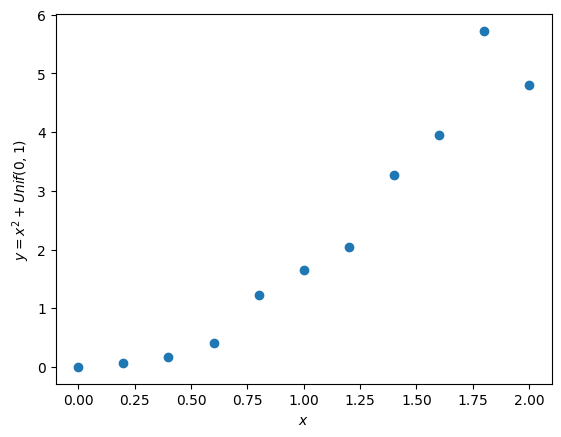

In [6]:
plt.scatter(points[0,:],points[1,:])
plt.xlabel("$x$")
plt.ylabel("$y = x^2+Unif(0,1)$")
plt.show()

Now we use the `gsFitting` class of `pygismo` to fit a curve through the created dataset. The fitting class takes as input the parameters, the points and a basis to be fitted on:

In [7]:
fitter = gs.modelling.gsFitting(pars,points,basis)

Then, the fit is computed by calling `compute()`

In [8]:
fitter.compute()

And the result is obtained by calling `result()`.

In [9]:
fit = fitter.result()

We can plot the result by constructing a parameter vector and by evaluating the fit, as we have seen before.

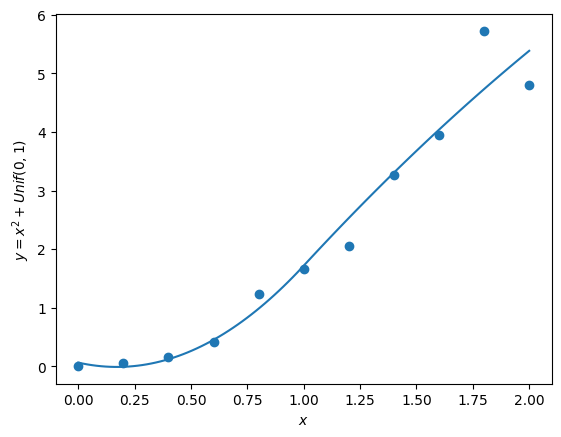

In [10]:
x = np.linspace(0,1,100)
x = np.meshgrid(x)
y = fit.eval(x)

plt.plot(y[0,:],y[1,:])
plt.scatter(points[0,:],points[1,:])
plt.xlabel("$x$")
plt.ylabel("$y = x^2+Unif(0,1)$")
plt.show()
